#Лабораторна робота 1

**Виконала** студентка групи КІ-41мп Додонова Марія.

##Завдання

1. Обрати набір даних (датасет), який буде представляти собою часовий ряд (одновимірний
або багатовимірний).
- Дата сет можна знайти на сайті kaggle, або будь який на ваш вибір, головне, щоб дані були
репрезентативними і містили певну кількість записів для роботи з ними.
2. Зобразіть часовий ряд графічно (одним графіком якщо це однокритеріальна задача,
декількома - якщо багатокритеріальна).
3. Виконайте попередню обробку часового ряду:
- Перевірте дані на пропуски
- Виконайте фільтрацію даних часового ряду
- Зменшіть кількість атрибутів (у разі якщо це багатовимірний часовий ряд)

Приклади датасетів:  
https://www.kaggle.com/datasets/dhavalpatel555/us-stock-market-2020-to-2024?resource=download  
https://www.kaggle.com/datasets/michau96/device-market-in-india-over-last-15-years  
https://www.kaggle.com/datasets/shivamb/underwater-surface-temperature-dataset

##Виконання роботи

###Набір даних, який представляє собою часовий ряд

Оберемо набір даних Gurugram's Air Quality Index Time-Series Dataset із сайту kaggle, який представляє собою одновимірний часовий ряд.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pranaii/test-aqi")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/pranaii/test-aqi/versions/368


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/sector_51_daily_aqi.csv")
df.columns = ["ID", "Date", "AQI"]
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,ID,Date,AQI
0,0,2020-03-05,73.0
1,1,2020-03-06,55.0
2,2,2020-03-07,78.0
3,3,2020-03-08,120.0
4,4,2020-03-09,179.0


###Графічне зображення часового ряду

Зобразимо часовий ряд графічно.

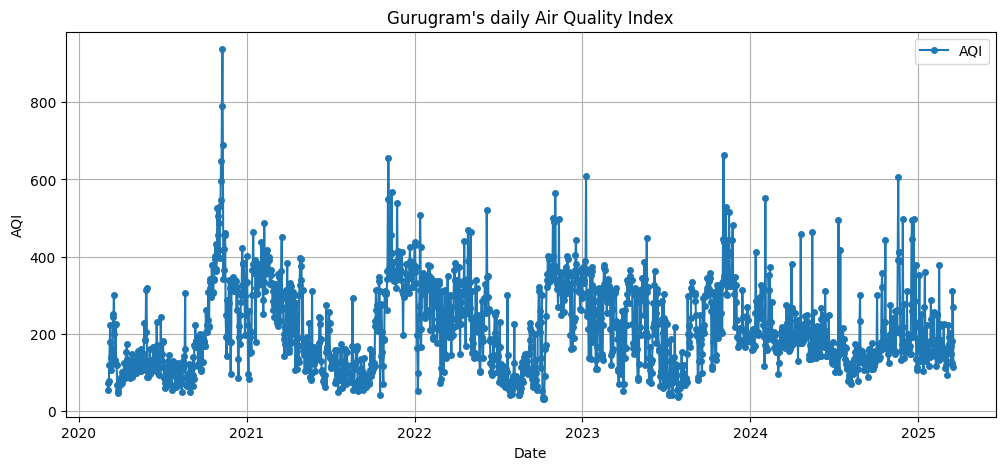

In [ ]:
import matplotlib.pyplot as plt

def plot_time_series(x, y, y_filtered=None,
                     title="Gurugram's daily Air Quality Index"):
  plt.figure(figsize=(12, 5))

  plt.plot(x, y, marker="o", markersize=4, label="AQI")

  if y_filtered is not None:
    plt.plot(x, y_filtered, linestyle="--",
             label="Filtered AQI")

  plt.xlabel("Date")
  plt.ylabel("AQI")
  plt.title(title)
  plt.legend()
  plt.grid(True)

  plt.show()

plot_time_series(df["Date"], df["AQI"])

###Попередня обробка часового ряду

Виконаємо попередню обробку часового ряду. Спершу перевіримо дані на пропуски.

In [ ]:
mask_na = df.isna()
mask_na.sum()

,0
ID,0
Date,0
AQI,2


Бачимо, що 2 записи містять пропущені дані ACQ. Виведемо їх.

In [ ]:
df[mask_na.any(axis=1)]

,ID,Date,AQI
1371,1371,2023-12-06,NaN
1378,1378,2023-12-13,NaN


Відобразимо ділянку з пропущеними значеннями.

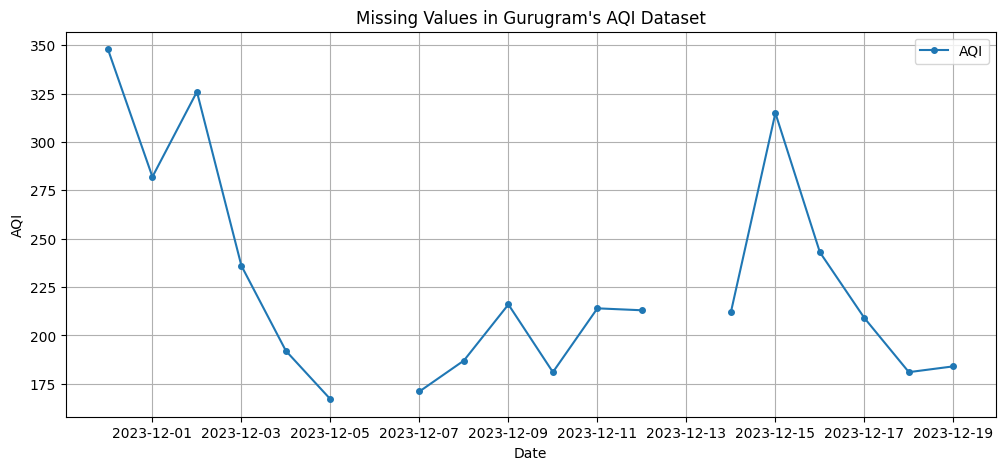

In [ ]:
plot_time_series(df["Date"][1365:1385], df["AQI"][1365:1385],
                 title="Missing Values in Gurugram's AQI Dataset")

Ці дані є пропущеними випадковим чином (missing completely at random, MCAR). Оскільки часовий ряд є одновимірним, видаляти ці дані не можна.

Так як пропущені дані розташовані не підряд, можемо застосувати метод заповнення середнім арифметичним. Для обчислення середнього арифметичного використовуватимемо по 2 значення з обох боків від пропущеного.

In [ ]:
missing_series = df["AQI"].copy()
mask = missing_series.isna()
missing_series[mask] = missing_series.rolling(
    window=5, center=True, min_periods=1).mean()[mask]
df["AQI"] = missing_series

df.isna().sum()

,0
ID,0
Date,0
AQI,0


Відобразимо ділянку із заповненими значеннями.

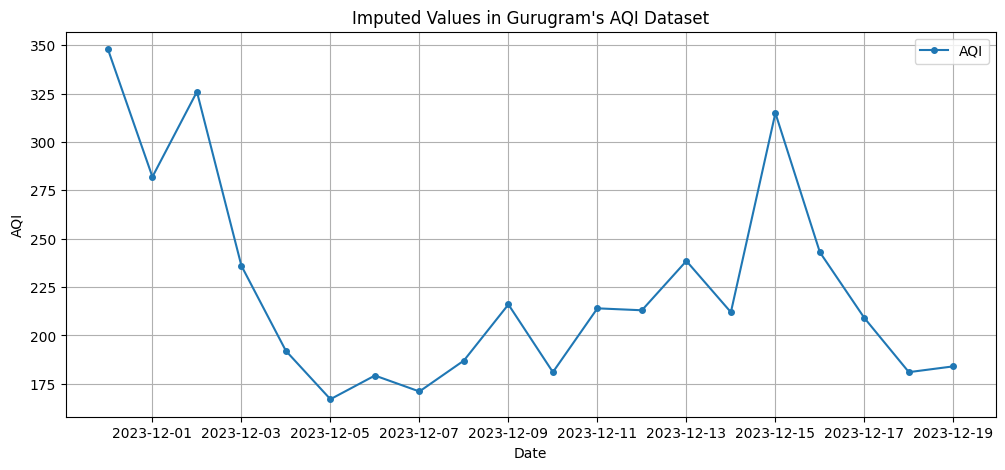

In [ ]:
plot_time_series(df["Date"][1365:1385], df["AQI"][1365:1385],
                 title="Imputed Values in Gurugram's AQI Dataset")

Виконаємо фільтрацію даних часового ряду. Застосуємо медіанний фільтр для видалення шумів та викидів зі збереженням структури даних. Розмір вікна оберемо 3.

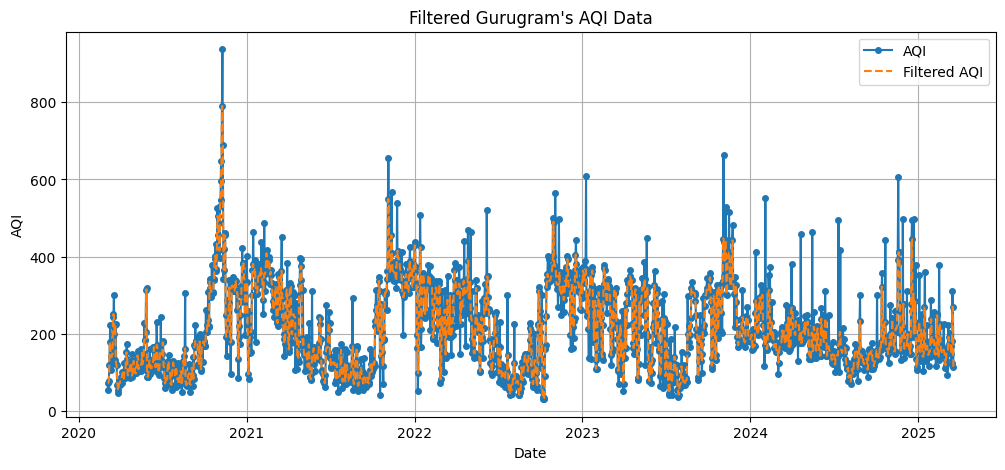

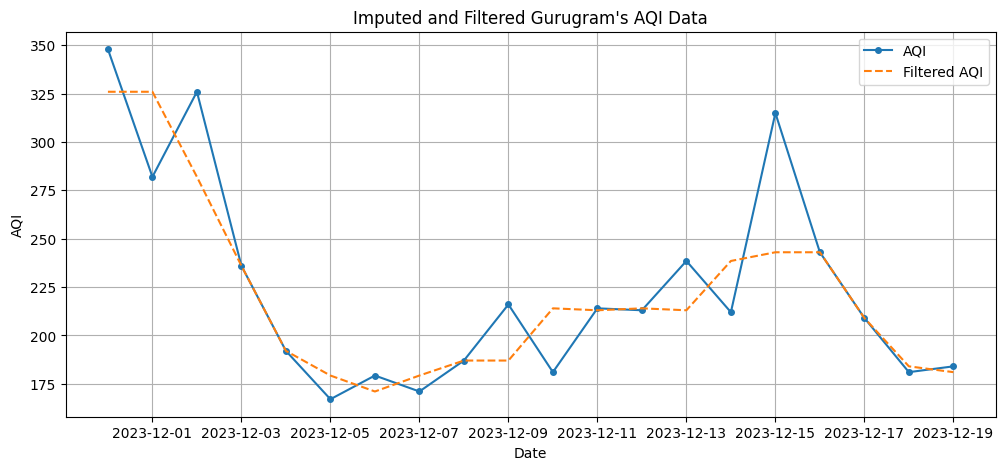

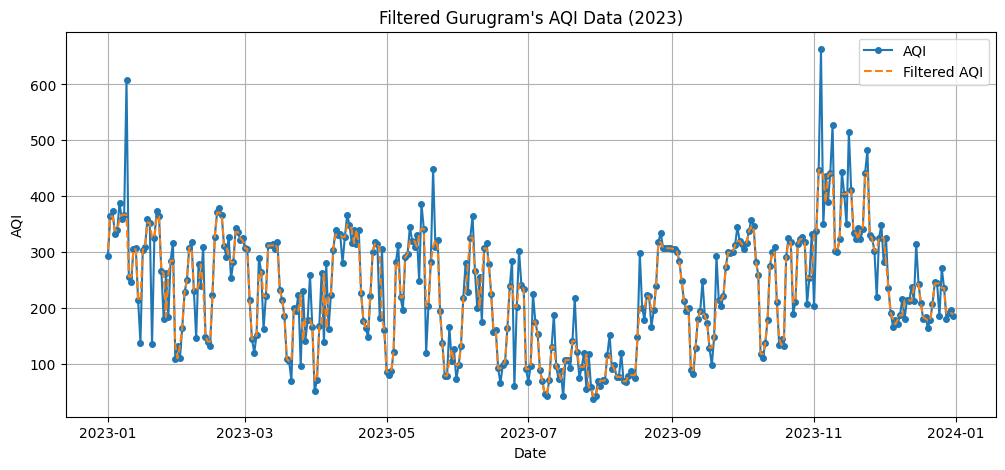

In [ ]:
import numpy as np

def median_filter(data, window_size=3):
  filtered_data = np.zeros_like(data)
  for i in range(len(data)):
    if i < window_size // 2 or i >= len(data) - window_size // 2:
      filtered_data[i] = data[i]
    else:
      window_data = data[i - window_size // 2: i + window_size // 2 + 1]
      filtered_data[i] = np.median(window_data)
  return filtered_data

median_filtered = median_filter(df["AQI"])

plot_time_series(df["Date"], df["AQI"], y_filtered=median_filtered,
                 title="Filtered Gurugram's AQI Data")
plot_time_series(df["Date"][1365:1385], df["AQI"][1365:1385],
                 y_filtered=median_filtered[1365:1385],
                 title="Imputed and Filtered Gurugram's AQI Data")
plot_time_series(df["Date"][1032:1397], df["AQI"][1032:1397],
                 y_filtered=median_filtered[1032:1397],
                 title="Filtered Gurugram's AQI Data (2023)")

##Висновок

У ході виконання лобораторної роботи було проаналізовано та опрацьовано часовий ряд із датасету Air Quality Index Time-Series Dataset із сайту Kaggle.

Було виконано графічне відображення даних, дозволило візуально оцінити тренди та коливання у часовому ряді. Заміна пропущених значень на середнє арифметичне дозволила запобігти втраті даних. Також була здійснена фільтрація даних за допомогою медіанного фільтра, що дало можливість зменшити вплив шумів та викидів на дані.

У результаті застосування цих методів забезпечено придатність часового ряду для аналізу та моделювання.

## Джерела даних
Gurugram's Air Quality Index Time-Series Dataset отримано з Kaggle:  
https://www.kaggle.com/datasets/pranaii/test-aqi?select=sector_51_daily_aqi.csv.